In [108]:
import torch

import scipy.io
import matplotlib.pyplot as plt

from pathlib import Path

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [2]:
# load input spike data
data_folder = Path.cwd() / 'data' / '01.mat'
mat = scipy.io.loadmat(data_folder) # animal 01

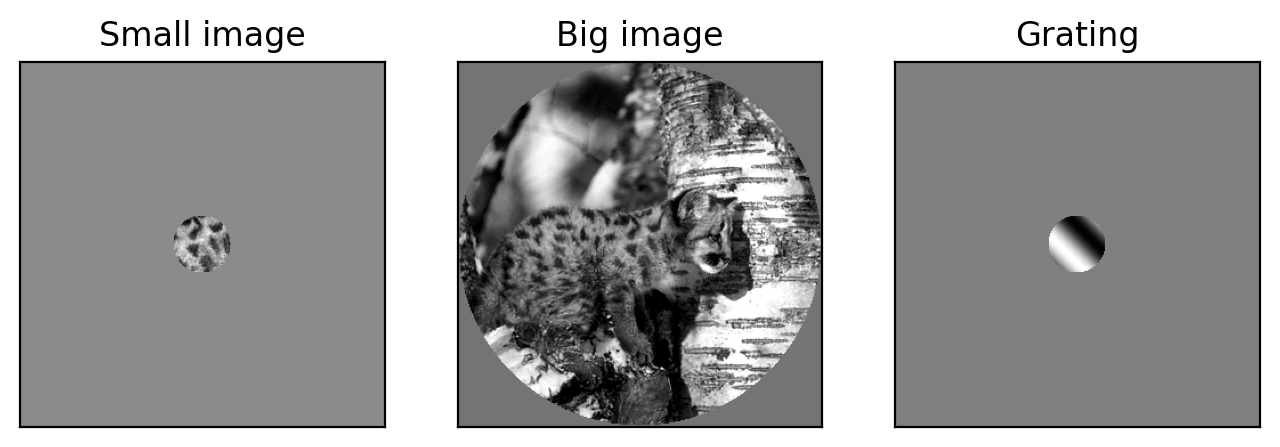

In [3]:
# plot some sample images for each category
images_all = mat['images'].squeeze()
fig, ax = plt.subplots(1, 3, figsize=(8, 8))

fig_titles = ['Small image', 'Big image', 'Grating']
fig_idx = [538, 539, 600]
for i in range(3):
    ax[i].imshow(images_all[fig_idx[i]], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(fig_titles[i])

plt.show()

In [137]:
# target
target = torch.load(Path('data') / 'val_images_gratings.pt')

In [138]:
# load plots
loss_hist = torch.load(Path('outputs') / 'loss_hist_train.pt')
decoded_image = torch.load(Path('outputs') / 'decoded_image_val.pt')
spk_rec = torch.load(Path('outputs') / 'spk_rec_val.pt')
mem_rec = torch.load(Path('outputs') / 'mem_rec_val.pt')

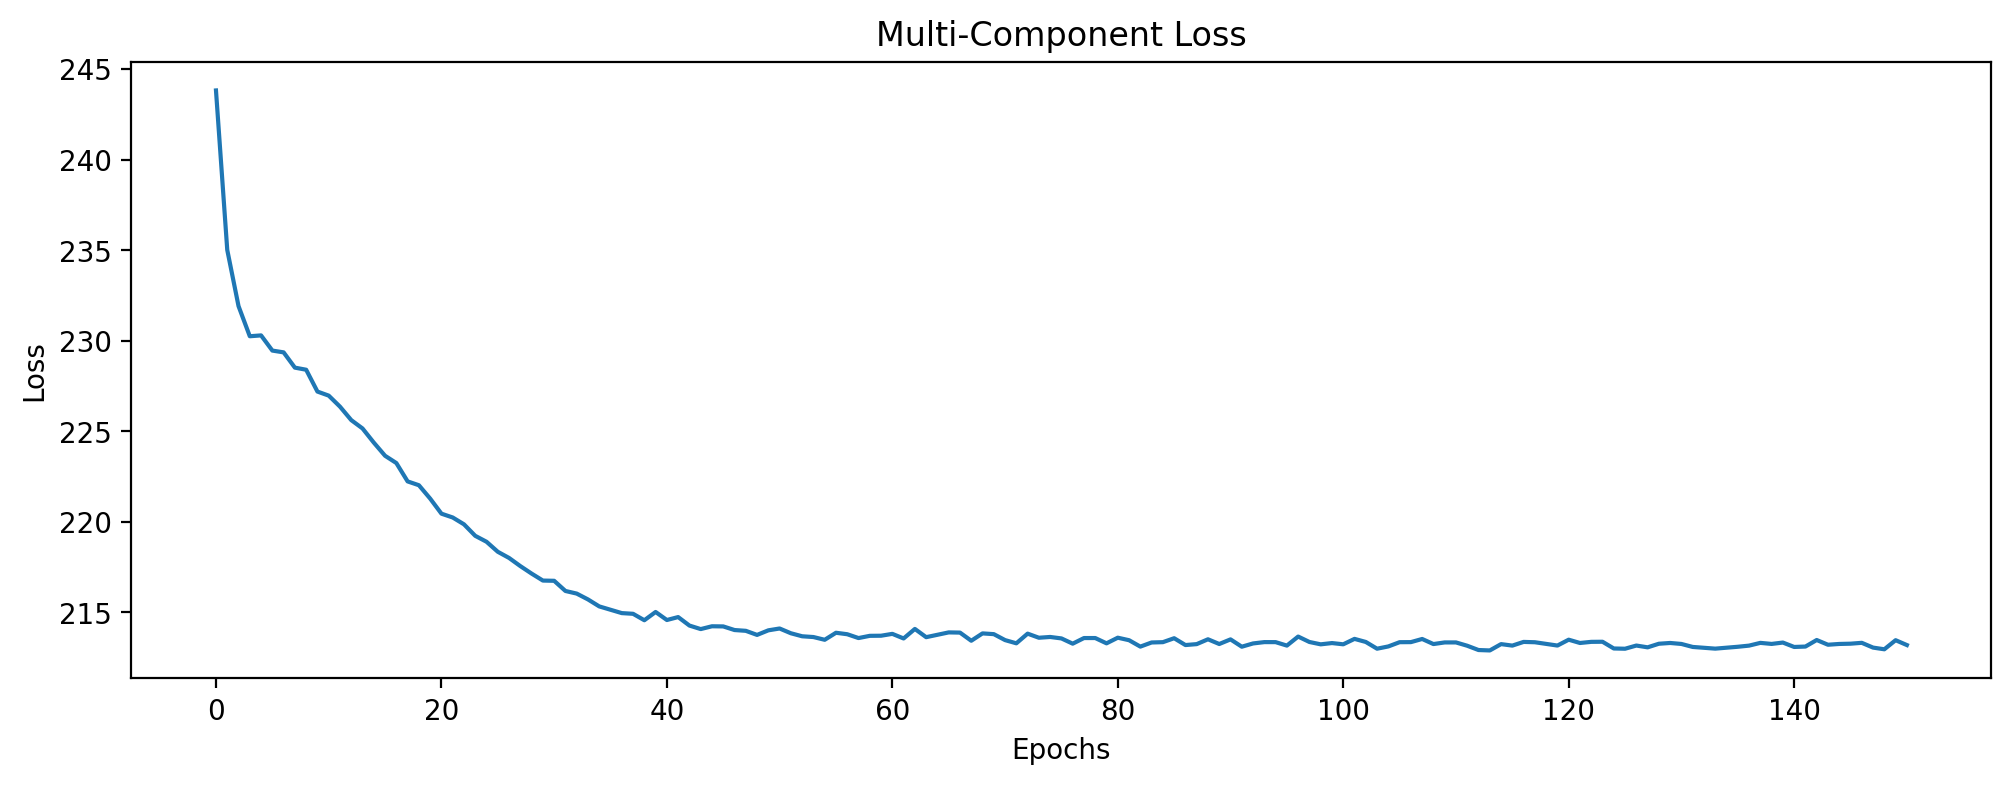

In [143]:
fig, ax = plt.subplots(figsize=(12, 4))

plt.plot(loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multi-Component Loss')
plt.show()

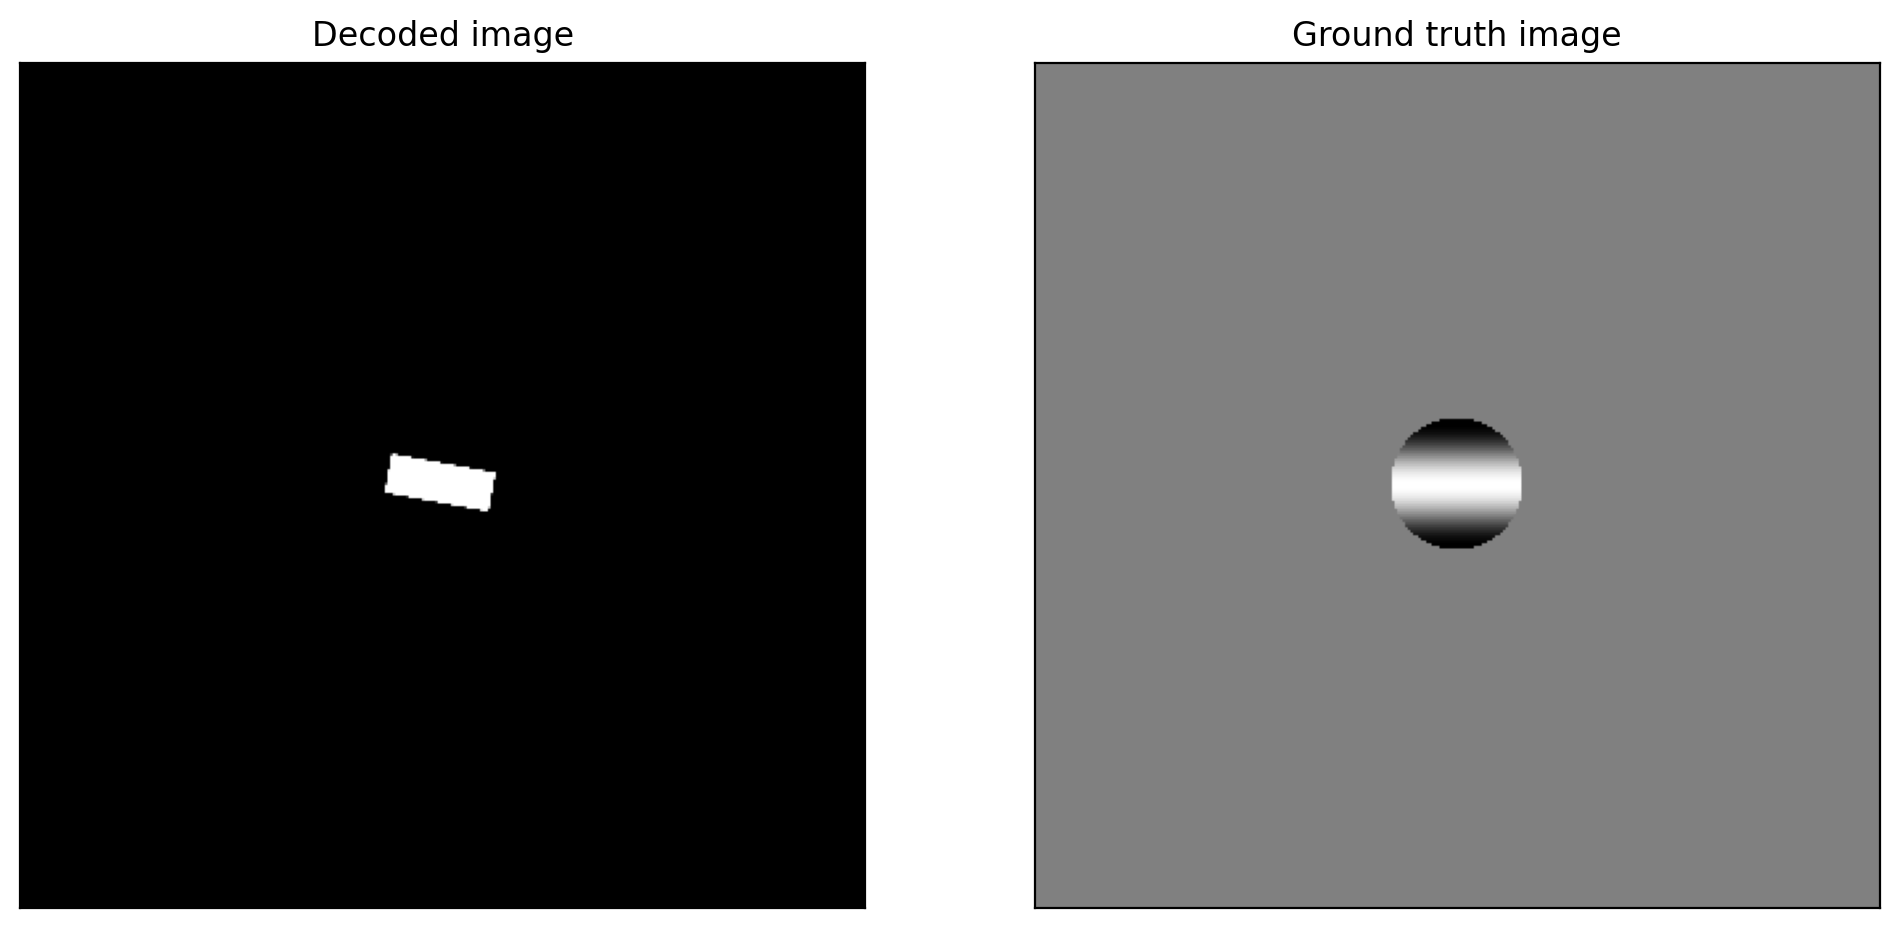

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(decoded_image[0].detach().numpy(), cmap='gray')
ax[0].set_title('Decoded image')

ax[1].imshow(target[0], cmap='gray')
ax[1].set_title('Ground truth image')

for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [145]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle('Decoded Images vs Ground Truth', fontsize=16)

for i in range(8):
    # Calculate row and column position for decoded image
    row = (i * 2) // 4
    col = (i * 2) % 4
    
    # Plot decoded image
    axs[row, col].imshow(decoded_image[i].detach().numpy(), cmap='gray')
    axs[row, col].set_title(f'Decoded {i+1}')
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    
    # Plot corresponding ground truth
    axs[row, col+1].imshow(target[i], cmap='gray')
    axs[row, col+1].set_title(f'Ground Truth {i+1}')
    axs[row, col+1].set_xticks([])
    axs[row, col+1].set_yticks([])

plt.tight_layout()
plt.savefig('outputs/decodedimagegrid.png', dpi=300, bbox_inches='tight')
plt.close()